<H1>NYC Short-Term Rental Prices Exploratory Data Analysis (EDA)</H1>

<H3>1. Install Packages</H3>

In [1]:
!pip install wandb==0.16.0
!pip install ydata-profiling==4.12.1
!pip install pandas==2.1.3
!pip install numpy==1.26 4
!pip install matplotlib==3.8.2
!pip install seaborn==0.13.2

  Using cached numpy-1.26.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
ERROR: Ignored the following versions that require a different python version: 2.3.0rc1 Requires-Python >=3.11
ERROR: Could not find a version that satisfies the requirement 4 (from versions: none)
ERROR: No matching distribution found for 4


In [2]:
# Import Packages

import math
import wandb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/home/k-irw/miniconda3/envs/mlflow-66b17a5b4a3c0be248e79ae667bd11065a528373/lib/python3.10/site-packages/wandb/sdk/launch/builder/build.py:11: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


<H3>2. Fetch the Artifact (sample.csv) from W&B and Read it with Pandas:</H3>

In [3]:
# Note that we use save_code=True in the call to wandb.init so the notebook is uploaded and versioned by W&B

# Initiate wandb run
run = wandb.init(project="nyc_airbnb", group="eda", save_code=True)

# Set Path to Artifact
local_path = wandb.use_artifact("sample.csv:latest").file()

# Load Data into DataFrame
df = pd.read_csv(local_path)


/home/k-irw/miniconda3/envs/mlflow-66b17a5b4a3c0be248e79ae667bd11065a528373/lib/python3.10/site-packages/wandb/sdk/launch/builder/build.py:11: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
wandb: Currently logged in as: kirwi33 (kirwi33-western-governors-university). Use `wandb login --relogin` to force relogin


<H3>3. Explore the Data in the DataFrame</H3>

In [4]:
# Get Basic df Shape

df.shape

(20000, 16)

In [5]:
# Inspect First Five Rows

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9138664,Private Lg Room 15 min to Manhattan,47594947,Iris,Queens,Sunnyside,40.74271,-73.92493,Private room,74,2,6,2019-05-26,0.13,1,5
1,31444015,TIME SQUARE CHARMING ONE BED IN HELL'S KITCHEN...,8523790,Johlex,Manhattan,Hell's Kitchen,40.76682,-73.98878,Entire home/apt,170,3,0,NaN,NaN,1,188
2,8741020,Voted #1 Location Quintessential 1BR W Village...,45854238,John,Manhattan,West Village,40.73631,-74.00611,Entire home/apt,245,3,51,2018-09-19,1.12,1,0
3,34602077,Spacious 1 bedroom apartment 15min from Manhattan,261055465,Regan,Queens,Astoria,40.76424,-73.92351,Entire home/apt,125,3,1,2019-05-24,0.65,1,13
4,23203149,Big beautiful bedroom in huge Bushwick apartment,143460,Megan,Brooklyn,Bushwick,40.69839,-73.92044,Private room,65,2,8,2019-06-23,0.52,2,8


In [6]:
# Inspect Last Five Rows

df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
19995,7094539,Tranquil haven in bubbly Brooklyn,2052211,Adriana,Brooklyn,Windsor Terrace,40.65360,-73.97546,Entire home/apt,143,14,2,2016-08-27,0.04,1,10
19996,4424261,Large 1 BR with backyard on UWS,3447311,Sarah,Manhattan,Upper West Side,40.80188,-73.96808,Entire home/apt,200,2,22,2019-05-21,0.50,1,0
19997,4545882,Amazing studio/Loft with a backyard,23569951,Kaveh,Manhattan,Upper East Side,40.78110,-73.94567,Entire home/apt,220,3,28,2019-05-23,0.50,1,293
19998,26518547,U2 comfortable double bed sleeps 2 guests,295128,Carol Gloria,Bronx,Clason Point,40.81225,-73.85502,Private room,80,1,4,2019-07-01,1.48,7,365
19999,33631782,Private Bedroom in Williamsburg Apt!,8569221,Andi,Brooklyn,Williamsburg,40.71829,-73.95819,Private room,109,3,3,2019-04-28,1.07,2,97


In [7]:
# Inspect Column Info Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20000 non-null  int64  
 1   name                            19993 non-null  object 
 2   host_id                         20000 non-null  int64  
 3   host_name                       19992 non-null  object 
 4   neighbourhood_group             20000 non-null  object 
 5   neighbourhood                   20000 non-null  object 
 6   latitude                        20000 non-null  float64
 7   longitude                       20000 non-null  float64
 8   room_type                       20000 non-null  object 
 9   price                           20000 non-null  int64  
 10  minimum_nights                  20000 non-null  int64  
 11  number_of_reviews               20000 non-null  int64  
 12  last_review                     

In [8]:
# Summarize Missing Data

df.isnull().sum()

id                                   0
name                                 7
host_id                              0
host_name                            8
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4123
reviews_per_month                 4123
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [9]:
# Inspect Column Statistical Data

df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,15877.000000,20000.000000,20000.000000
mean,1.892380e+07,6.746034e+07,40.728455,-73.952125,153.269050,6.992100,23.274100,1.377446,6.955450,112.901200
std,1.101223e+07,7.857936e+07,0.054755,0.046559,243.325609,21.645449,44.927793,1.683006,32.433831,131.762226
min,2.539000e+03,2.571000e+03,40.508730,-74.239140,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.393540e+06,7.853718e+06,40.689420,-73.983030,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.952117e+07,3.111431e+07,40.722730,-73.955640,105.000000,2.000000,5.000000,0.720000,1.000000,44.000000
75%,2.912936e+07,1.068426e+08,40.762990,-73.936380,175.000000,5.000000,23.000000,2.010000,2.000000,229.000000
max,3.648561e+07,2.742733e+08,40.913060,-73.717950,10000.000000,1250.000000,607.000000,27.950000,327.000000,365.000000


<H3>4. Graph the Numeric Data in the DataFrame</H3>

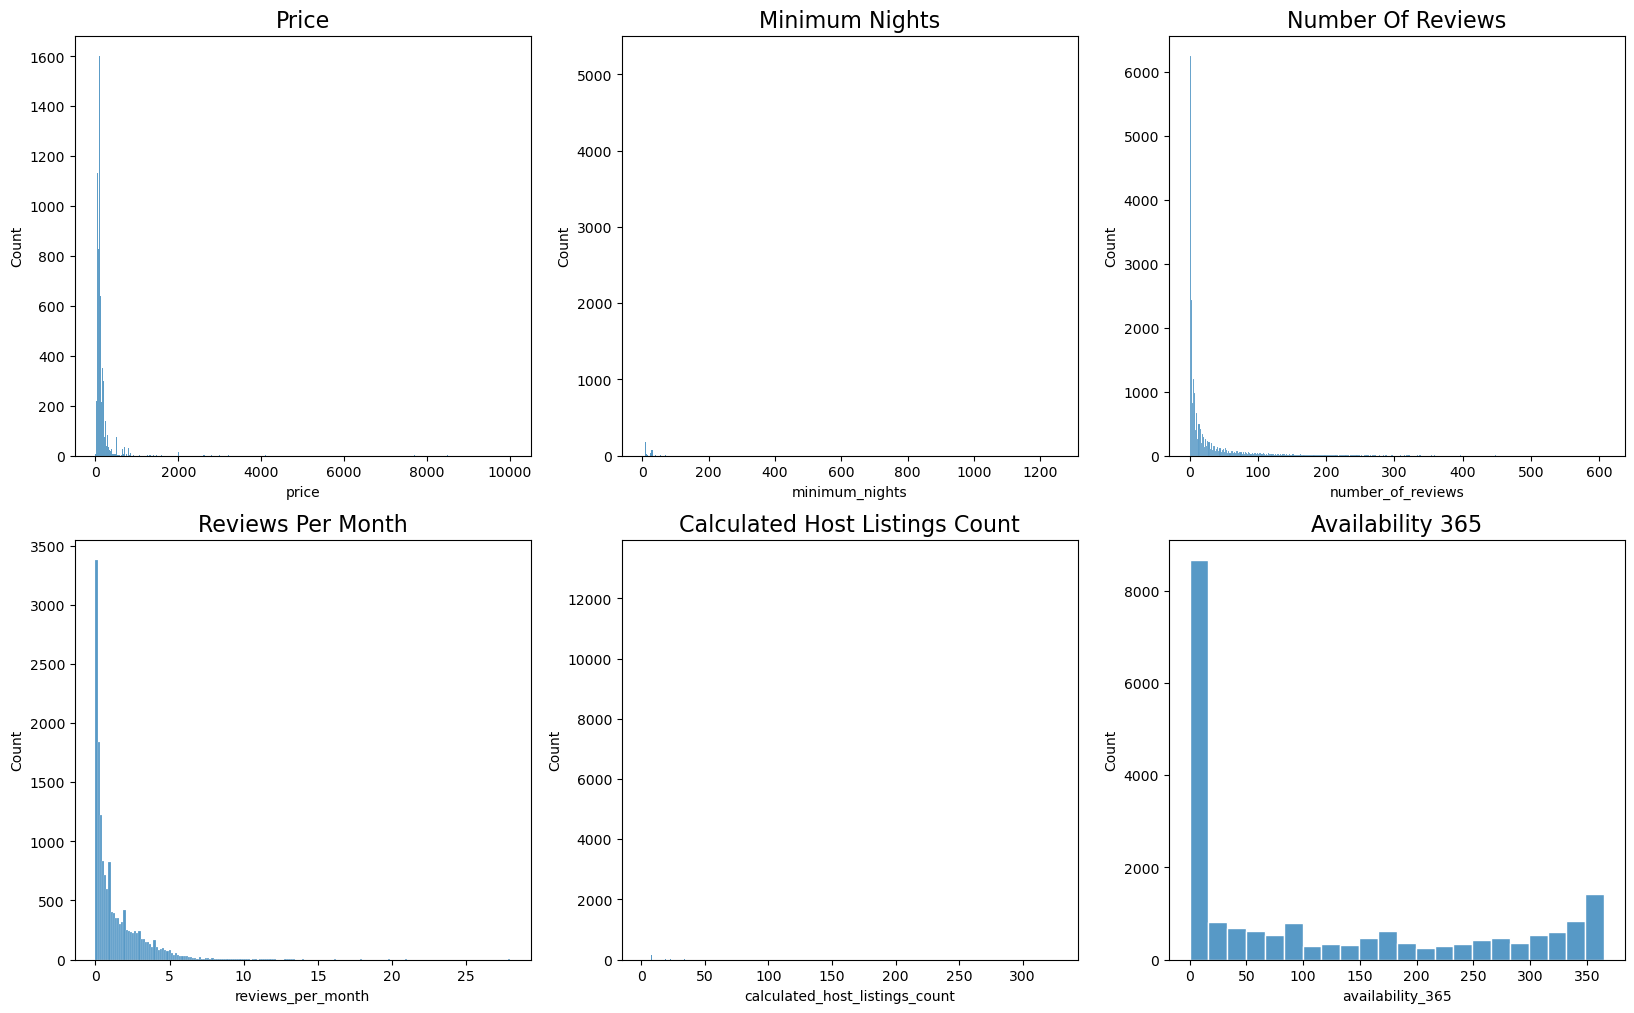

In [10]:
# Create Histogram of Numeric Column Data

# Set Veriables

Data_Columns = [
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

Columns = 3
Rows = math.ceil(len(Data_Columns)/Columns)

# Create Figure
fig, axes = plt.subplots(Rows, Columns, figsize=(20, 12))
axes = [axes[i][j] for i in range(Rows) for j in range(Columns)]
sns.set_theme(style="dark", palette="dark", color_codes='b')

# Plot Data
for i, col in zip(range(Rows * Columns), Data_Columns):

    # Create Plot
    ax = sns.histplot(data=df, x=col, ax=axes[i])

    # Set Title
    title = col.replace('_', ' ').title()
    ax.set_title(title, fontsize=16)


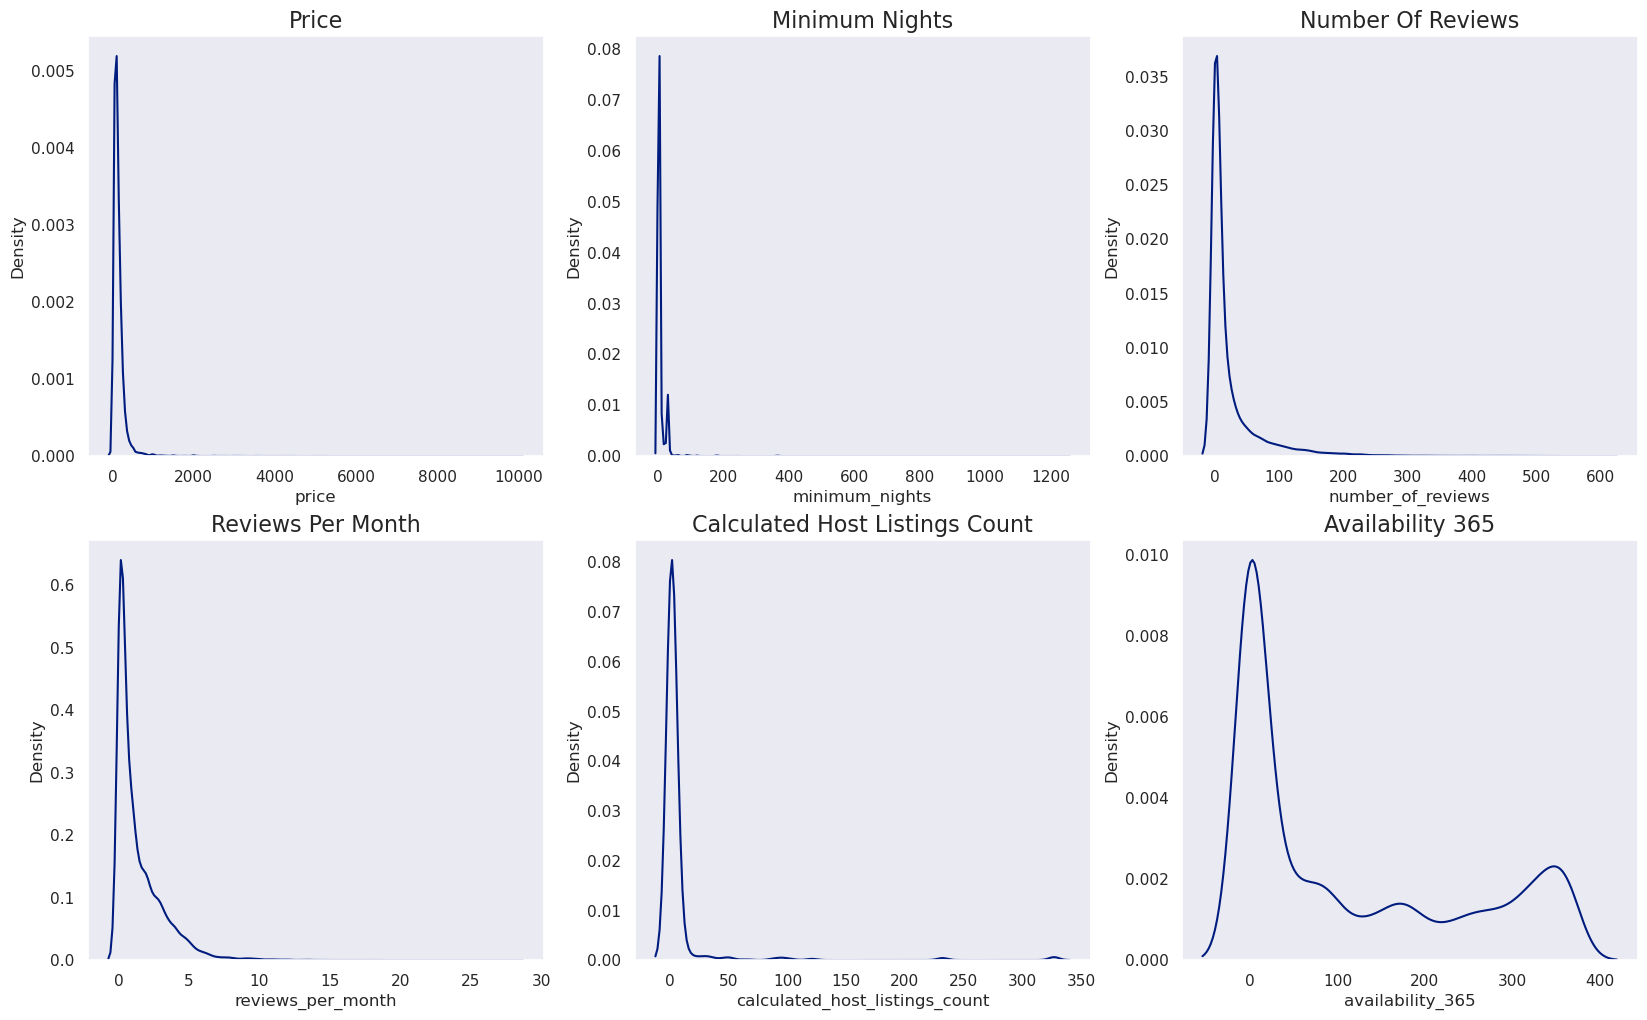

In [11]:
# Create Kernel Density Estimate Plot of Numeric Column Data

# Set Veriables

Data_Columns = [
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

Columns = 3
Rows = math.ceil(len(Data_Columns)/Columns)

# Create Figure
fig, axes = plt.subplots(Rows, Columns, figsize=(20, 12))
axes = [axes[i][j] for i in range(Rows) for j in range(Columns)]
sns.set_theme(style="darkgrid", palette="dark", color_codes='b')

# Plot Data
for i, col in zip(range(Rows * Columns), Data_Columns):

    # Create Plot
    ax = sns.kdeplot(data=df, x=col, ax=axes[i])

    # Set Title
    title = col.replace('_', ' ').title()
    ax.set_title(title, fontsize=16)

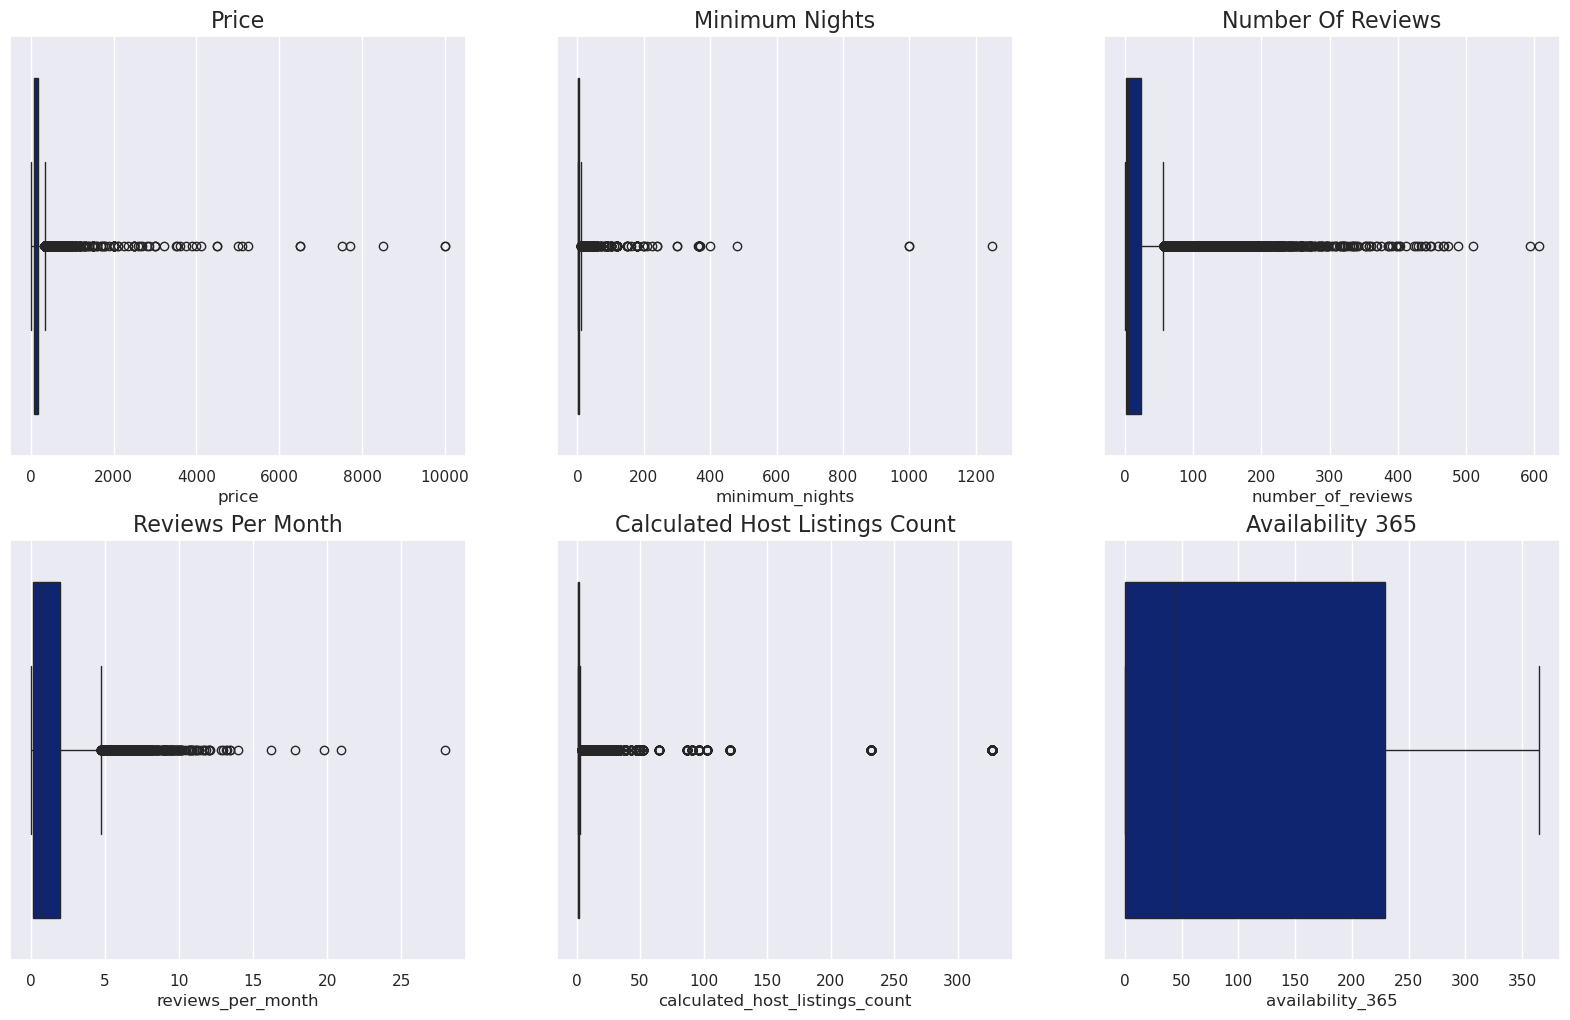

In [12]:
# Create Boxplot of Numeric Column Data

# Set Veriables

Data_Columns = [
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

Columns = 3
Rows = math.ceil(len(Data_Columns)/Columns)

# Create Figure
fig, axes = plt.subplots(Rows, Columns, figsize=(20, 12))
axes = [axes[i][j] for i in range(Rows) for j in range(Columns)]
sns.set_theme(style="dark", palette="dark", color_codes='b')

# Plot Data
for i, col in zip(range(Rows * Columns), Data_Columns):

    # Create Plot
    ax = sns.boxplot(data=df, x=col, ax=axes[i])

    # Set Title
    title = col.replace('_', ' ').title()
    ax.set_title(title, fontsize=16)

<H3>5. Explore Data Relations in the DataFrame</H3>

<H4>a. Numeric Columns vs Price Data</H4>

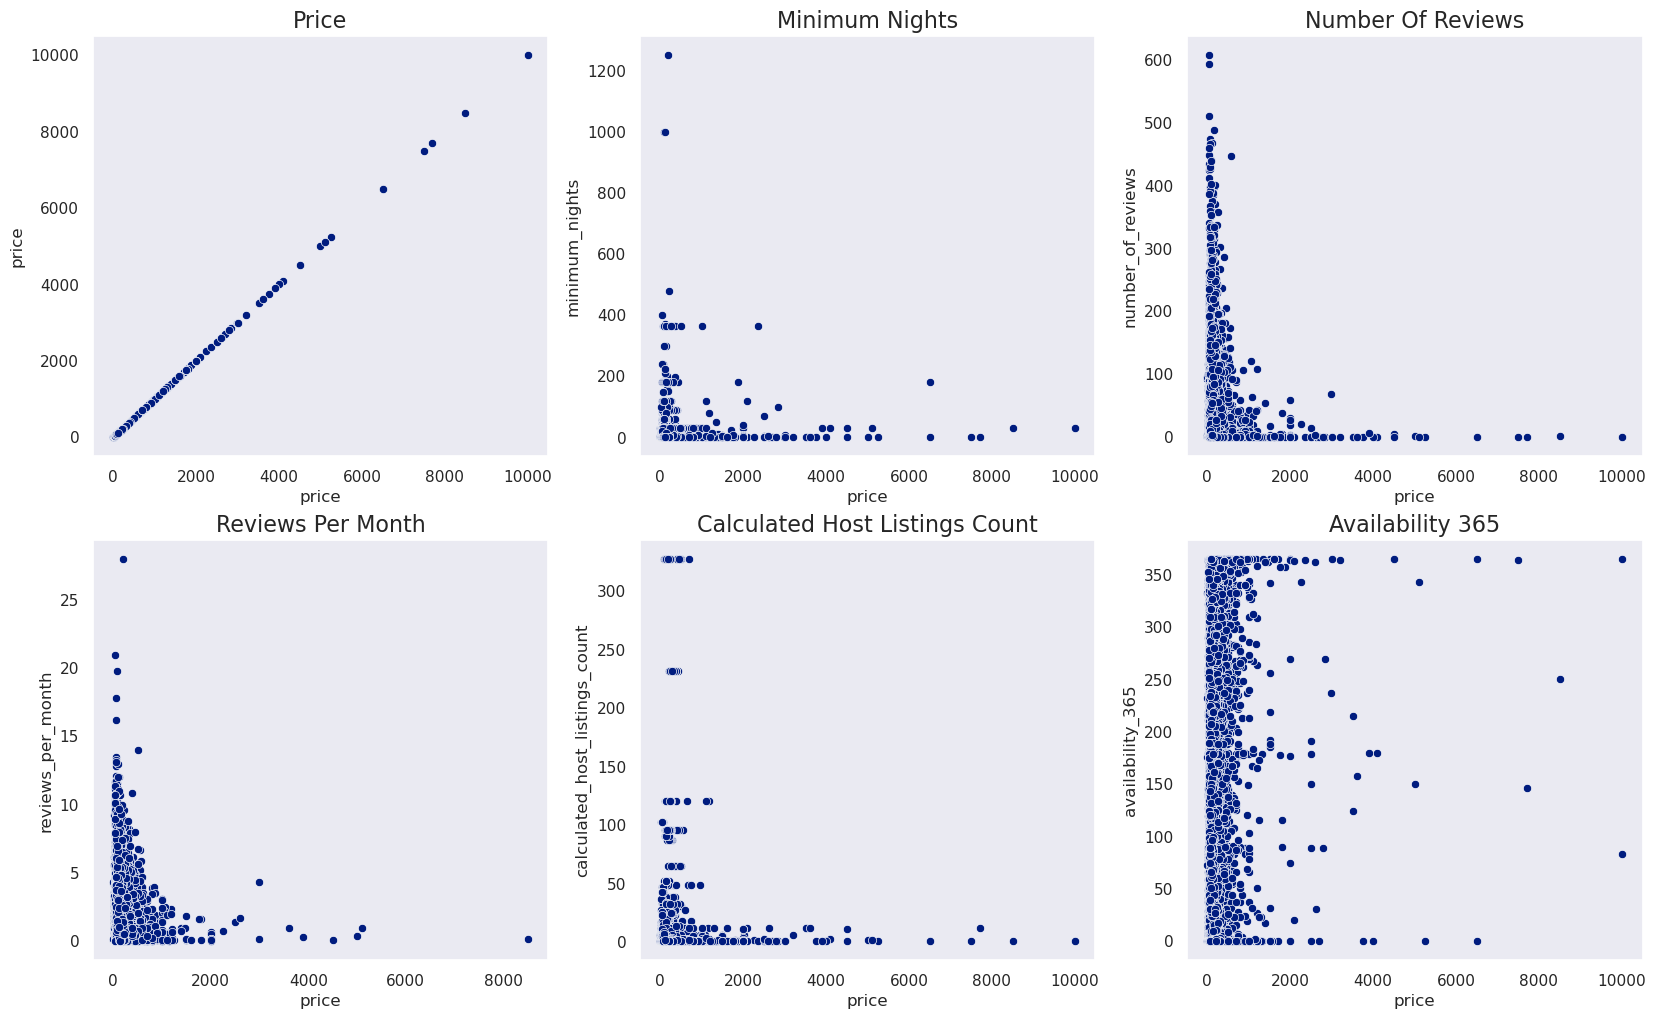

In [13]:
# Create Scatterplot of Numeric Columns vs Price Data

# Set Veriables
Target = 'price'

Data_Columns = [
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

Columns = 3
Rows = math.ceil(len(Data_Columns)/Columns)

# Create Figure
fig, axes = plt.subplots(Rows, Columns, figsize=(20, 12))
axes = [axes[i][j] for i in range(Rows) for j in range(Columns)]
sns.set_theme(style="dark", palette="dark", color_codes='b')

# Plot Data
for i, col in zip(range(Rows * Columns), Data_Columns):

    # Create Plot
    ax = sns.scatterplot(data=df, x=Target, y=col, ax=axes[i])

    # Set Title
    title = col.replace('_', ' ').title()
    ax.set_title(title, fontsize=16)

<H4>b. Numeric Columns vs Minimum Nights Data</H4>

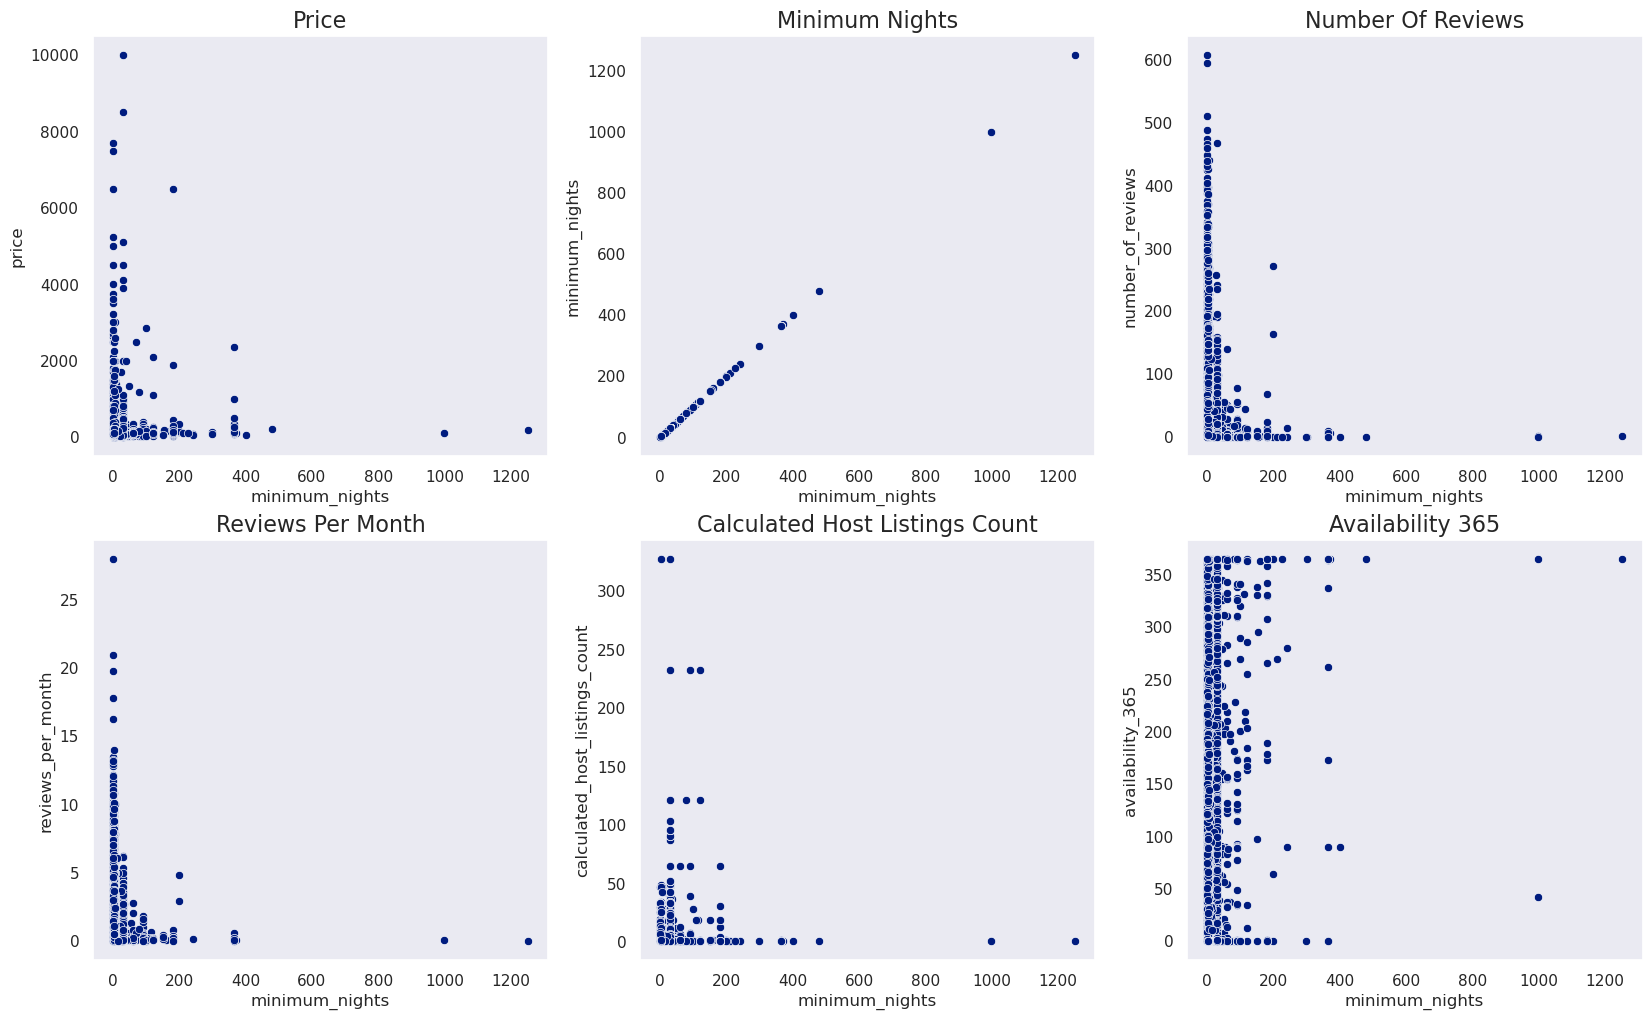

In [14]:
# Create Scatterplot of Numeric Columns vs Minimum Nights Data

# Set Veriables
Target = 'minimum_nights'

Data_Columns = [
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

Columns = 3
Rows = math.ceil(len(Data_Columns)/Columns)

# Create Figure
fig, axes = plt.subplots(Rows, Columns, figsize=(20, 12))
axes = [axes[i][j] for i in range(Rows) for j in range(Columns)]
sns.set_theme(style="dark", palette="dark", color_codes='b')

# Plot Data
for i, col in zip(range(Rows * Columns), Data_Columns):

    # Create Plot
    ax = sns.scatterplot(data=df, x=Target, y=col, ax=axes[i])

    # Set Title
    title = col.replace('_', ' ').title()
    ax.set_title(title, fontsize=16)

<H4>c. Numeric Columns vs Number of Reviews Data</H4>

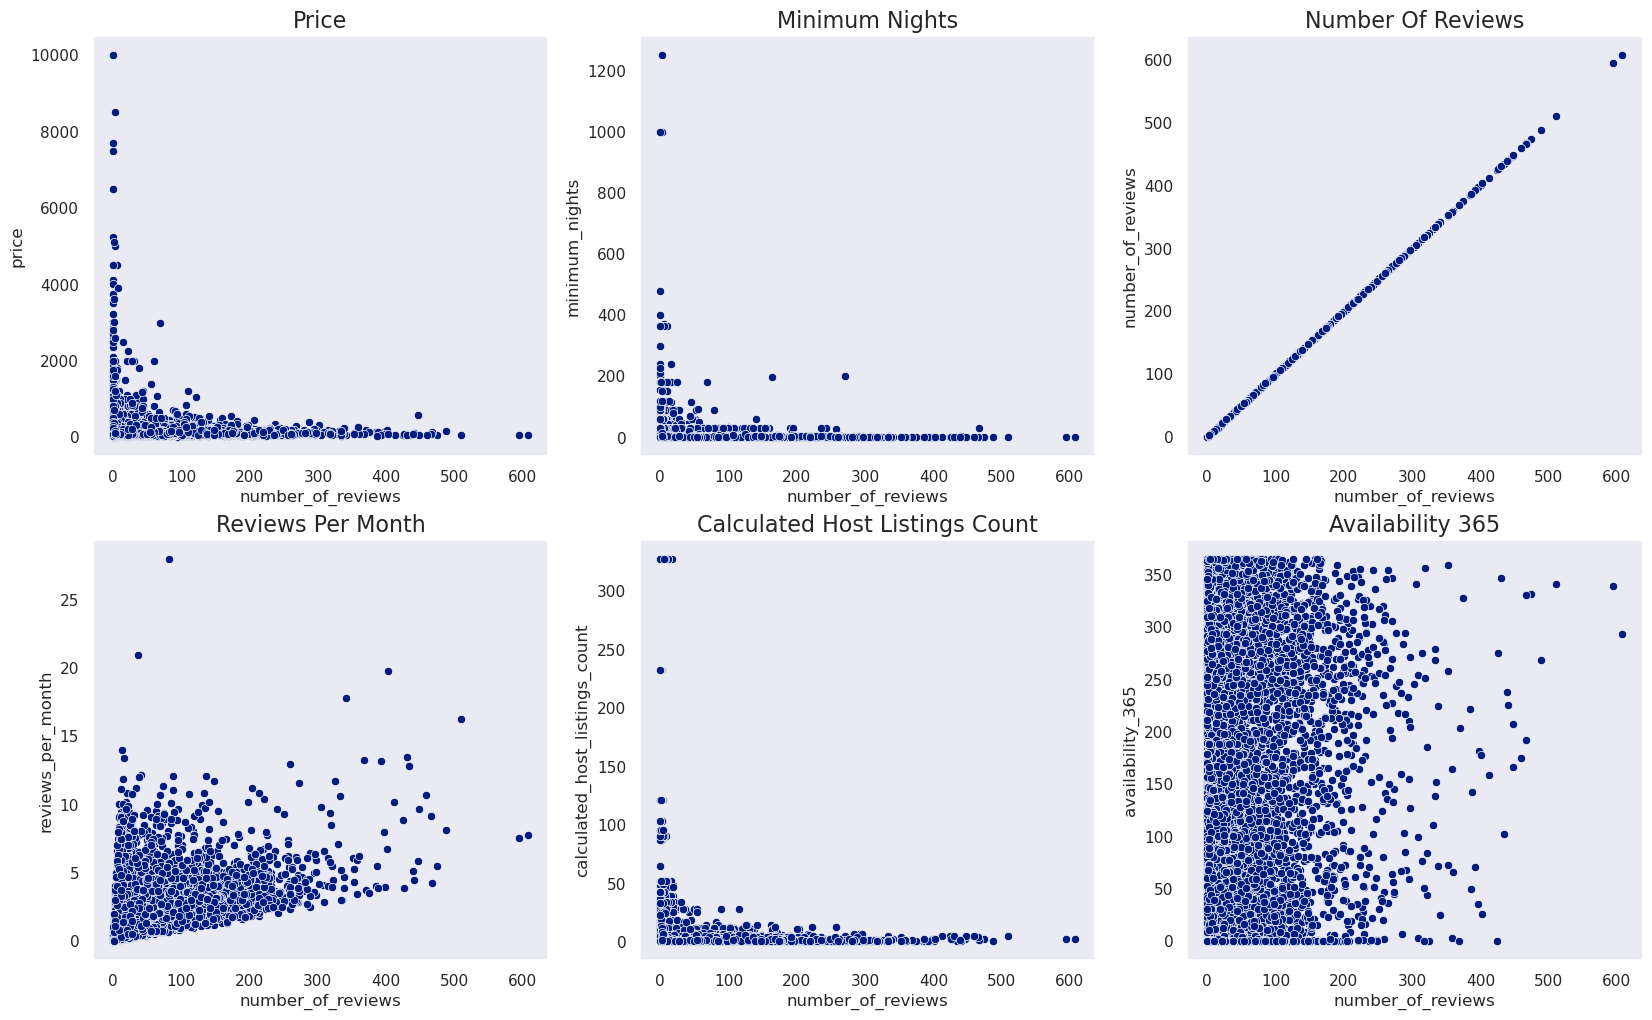

In [15]:
# Create Scatterplot of Numeric Columns vs Number of Reviews Data

# Set Veriables
Target = 'number_of_reviews'

Data_Columns = [
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

Columns = 3
Rows = math.ceil(len(Data_Columns)/Columns)

# Create Figure
fig, axes = plt.subplots(Rows, Columns, figsize=(20, 12))
axes = [axes[i][j] for i in range(Rows) for j in range(Columns)]
sns.set_theme(style="dark", palette="dark", color_codes='b')

# Plot Data
for i, col in zip(range(Rows * Columns), Data_Columns):

    # Create Plot
    ax = sns.scatterplot(data=df, x=Target, y=col, ax=axes[i])

    # Set Title
    title = col.replace('_', ' ').title()
    ax.set_title(title, fontsize=16)

<H4>d. Numeric Columns vs Reviews Per Month Data</H4>

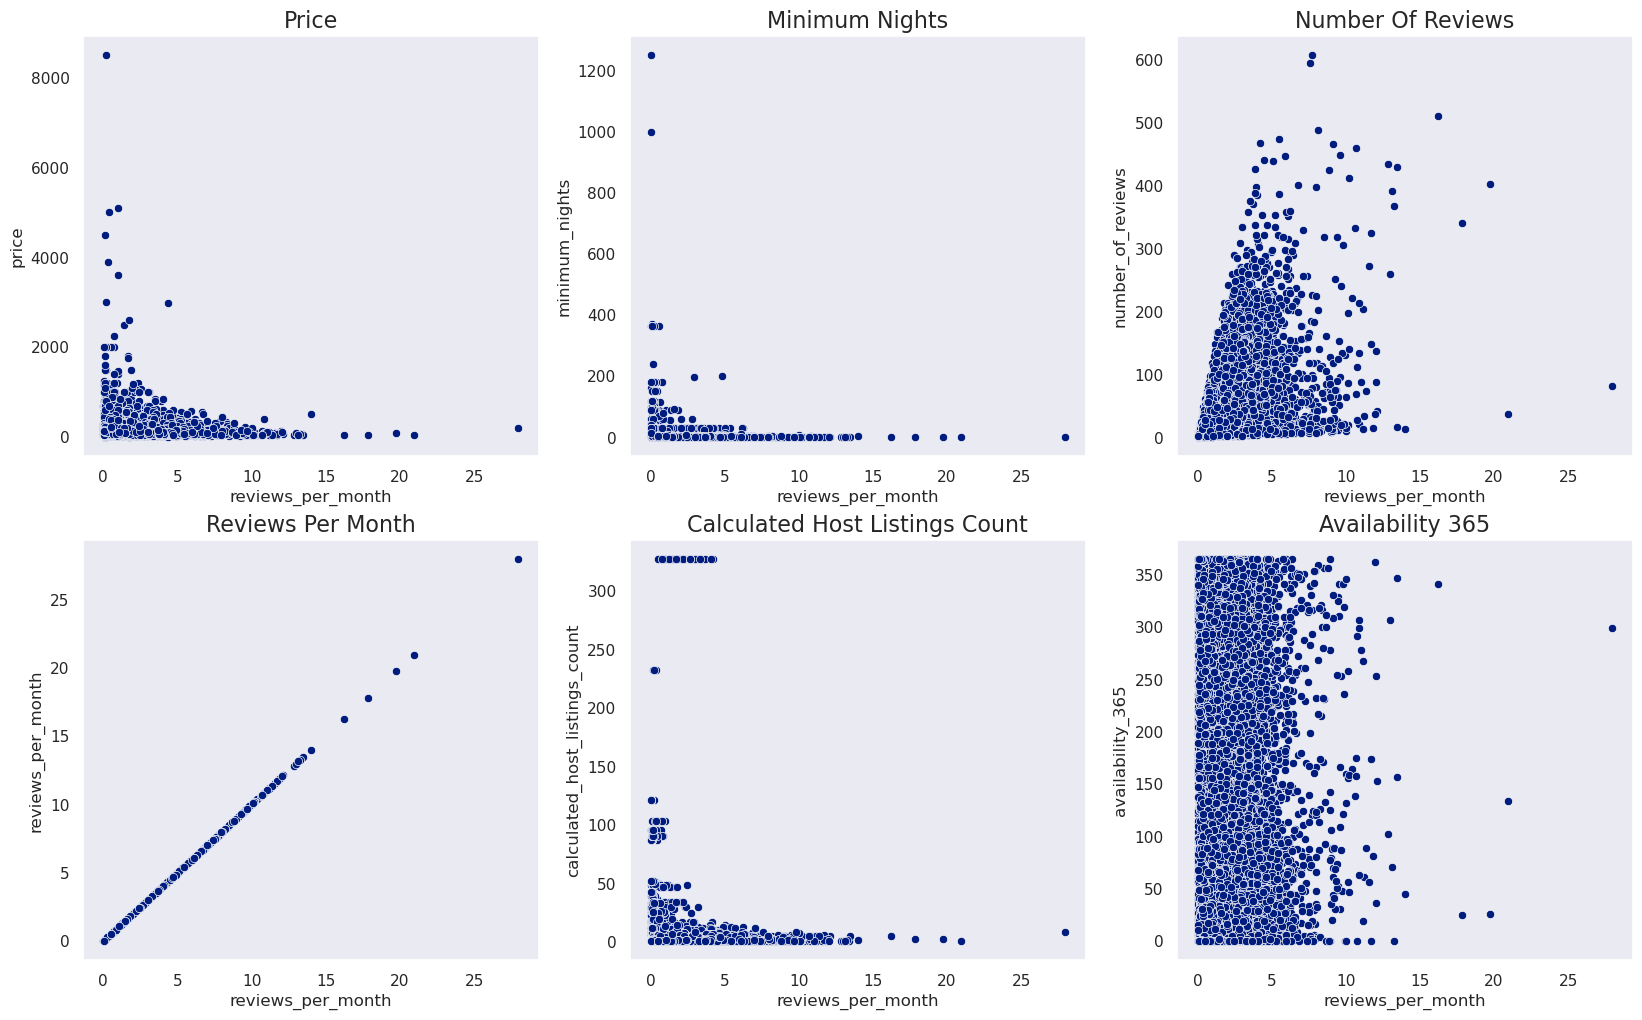

In [16]:
# Create Scatterplot of Numeric Columns vs Reviews Per Month Data

# Set Veriables
Target = 'reviews_per_month'

Data_Columns = [
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

Columns = 3
Rows = math.ceil(len(Data_Columns)/Columns)

# Create Figure
fig, axes = plt.subplots(Rows, Columns, figsize=(20, 12))
axes = [axes[i][j] for i in range(Rows) for j in range(Columns)]
sns.set_theme(style="dark", palette="dark", color_codes='b')

# Plot Data
for i, col in zip(range(Rows * Columns), Data_Columns):

    # Create Plot
    ax = sns.scatterplot(data=df, x=Target, y=col, ax=axes[i])

    # Set Title
    title = col.replace('_', ' ').title()
    ax.set_title(title, fontsize=16)

<H4>e. Numeric Columns vs Calculated Host Listings Count Data</H4>

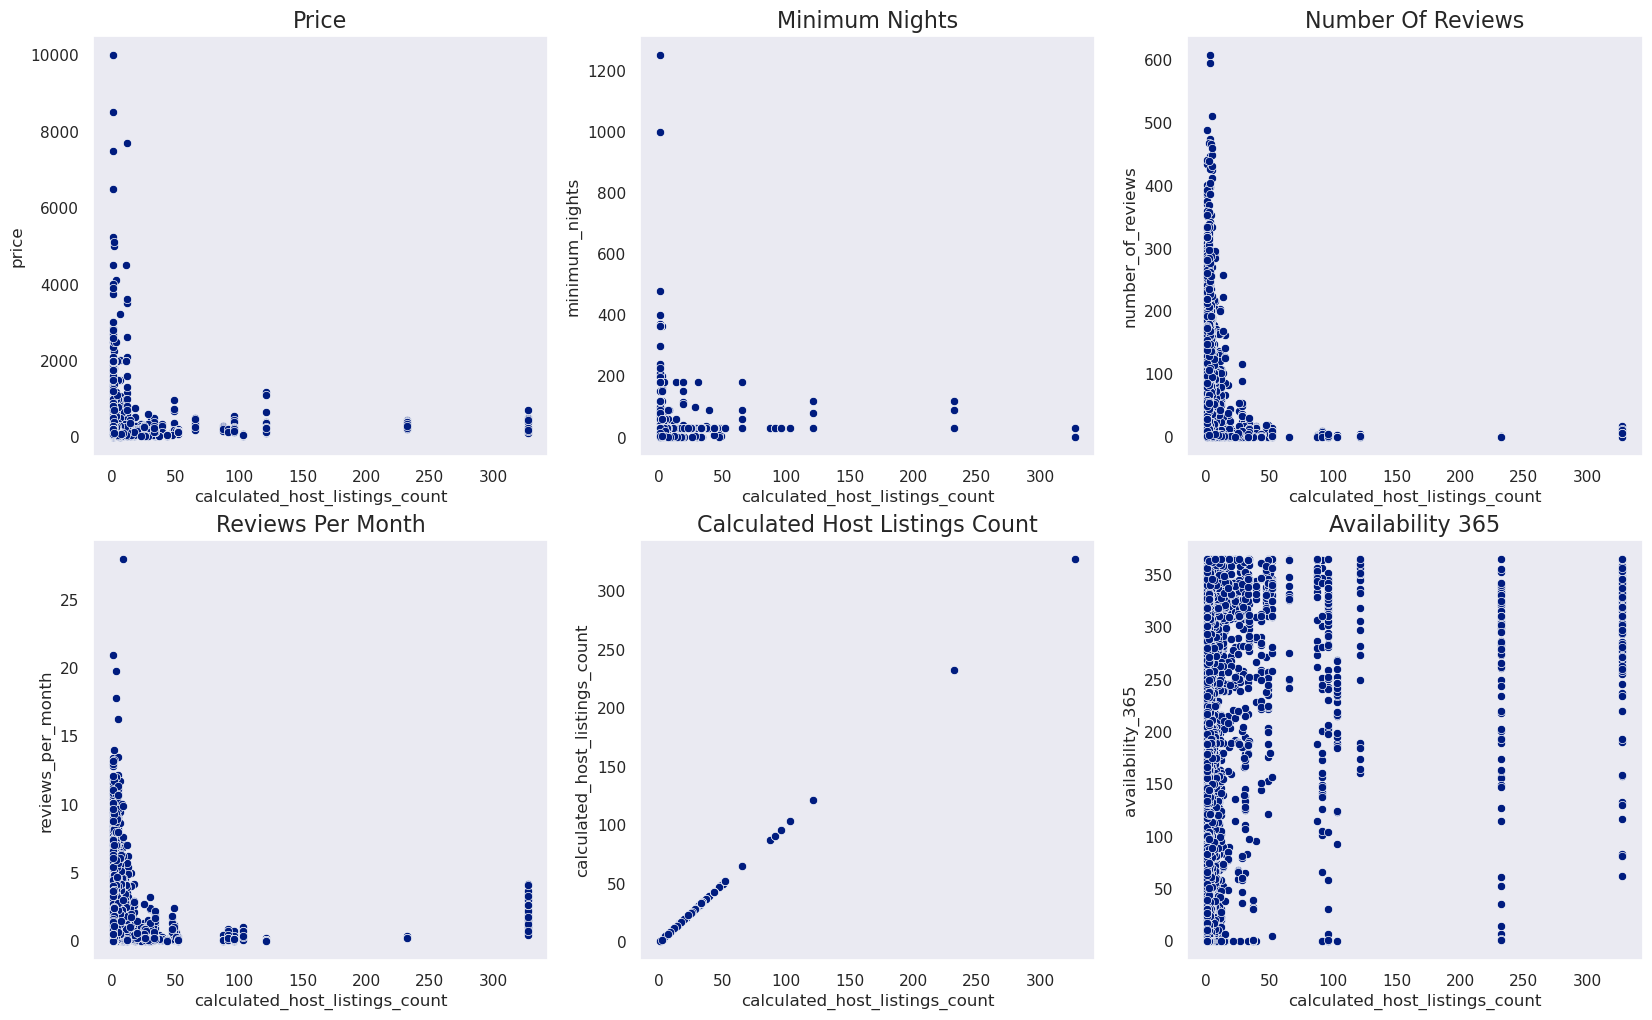

In [17]:
# Create Scatterplot of Numeric Columns vs Calculated Host Listings Count Data

# Set Veriables
Target = 'calculated_host_listings_count'

Data_Columns = [
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

Columns = 3
Rows = math.ceil(len(Data_Columns)/Columns)

# Create Figure
fig, axes = plt.subplots(Rows, Columns, figsize=(20, 12))
axes = [axes[i][j] for i in range(Rows) for j in range(Columns)]
sns.set_theme(style="dark", palette="dark", color_codes='b')

# Plot Data
for i, col in zip(range(Rows * Columns), Data_Columns):

    # Create Plot
    ax = sns.scatterplot(data=df, x=Target, y=col, ax=axes[i])

    # Set Title
    title = col.replace('_', ' ').title()
    ax.set_title(title, fontsize=16)

<H4>f. Numeric Columns vs Availability 365 Data</H4>

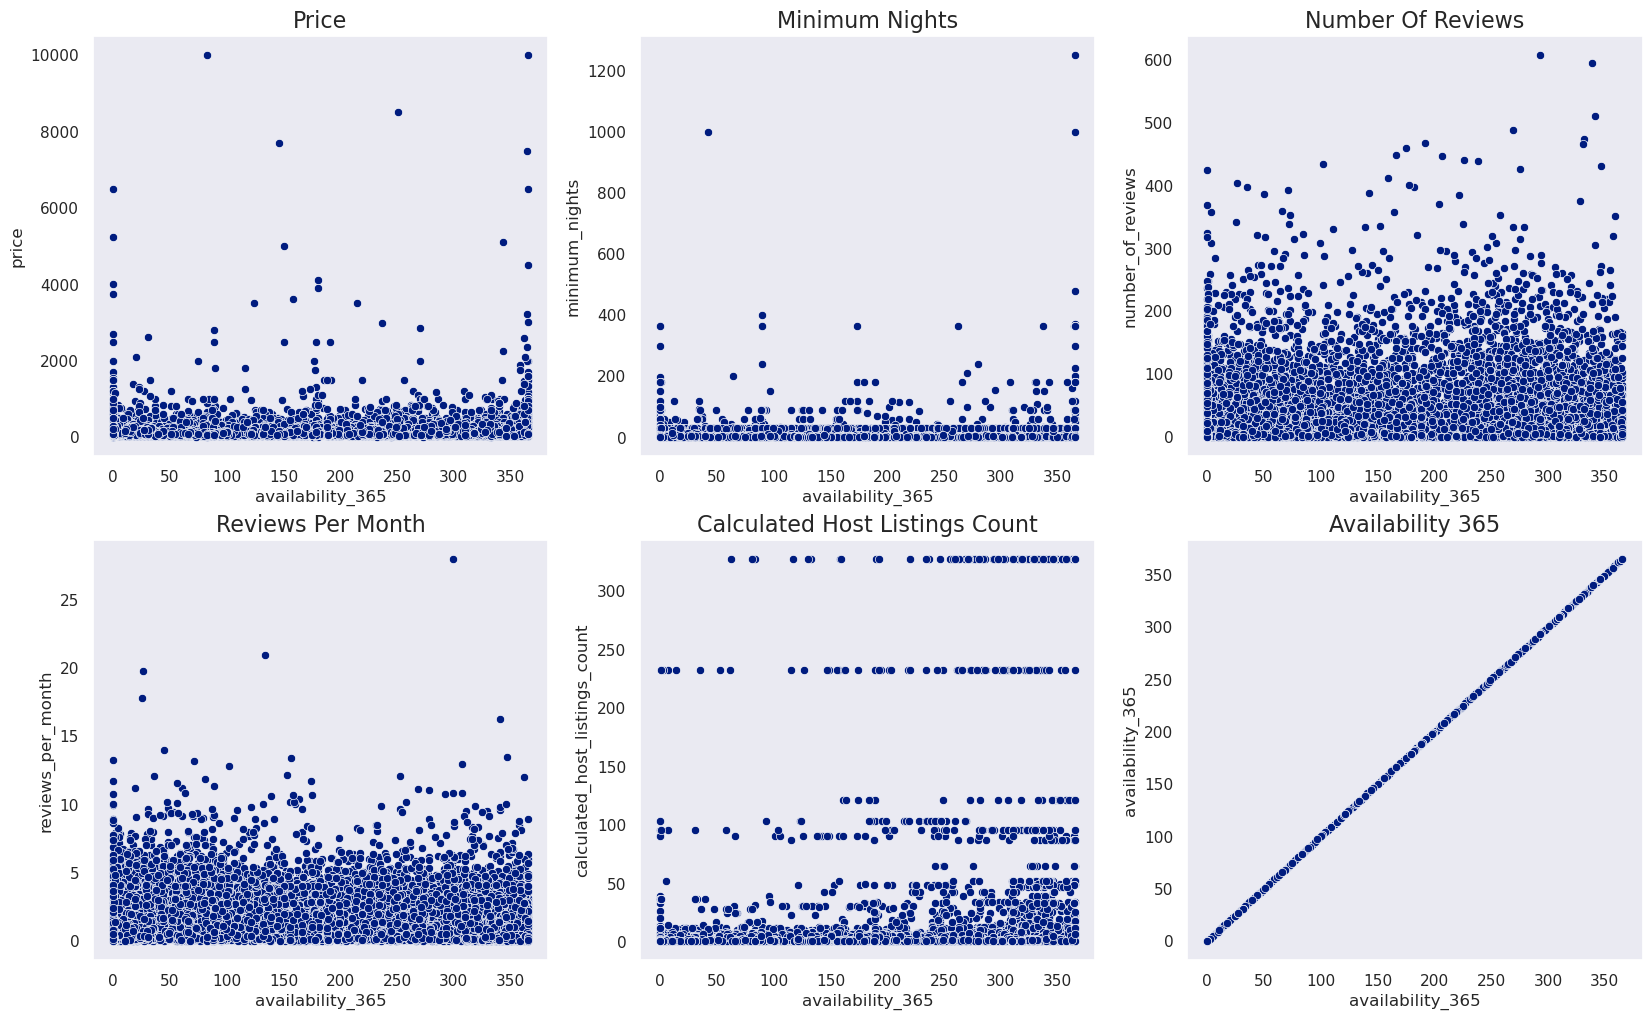

In [18]:
# Create Scatterplot of Numeric Columns vs Availability 365 Data

# Set Veriables
Target = 'availability_365'

Data_Columns = [
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

Columns = 3
Rows = math.ceil(len(Data_Columns)/Columns)

# Create Figure
fig, axes = plt.subplots(Rows, Columns, figsize=(20, 12))
axes = [axes[i][j] for i in range(Rows) for j in range(Columns)]
sns.set_theme(style="dark", palette="dark", color_codes='b')

# Plot Data
for i, col in zip(range(Rows * Columns), Data_Columns):

    # Create Plot
    ax = sns.scatterplot(data=df, x=Target, y=col, ax=axes[i])

    # Set Title
    title = col.replace('_', ' ').title()
    ax.set_title(title, fontsize=16)

3. What do you notice in the data? Look around and see what you can find.

> For example, there are missing values in a few columns and the column `last_review` is a date but it is in string format. Look also at the `price` column, and note the outliers. There are some zeros and some very high prices. After talking to your stakeholders, you decide to consider from a minimum of `$10` to a maximum of `$350` per night.

<H3>6. Correct Observed Problems Found in the Data</H3>

In [19]:
# Drop Outliers

min_price = 10
max_price = 350

idx = df['price'].between(min_price, max_price)

df = df[idx].copy()

print('Min Price: ', df['price'].min())
print('Max Price: ', df['price'].max())

Min Price:  10
Max Price:  350


In [20]:
# Convert last_review to datetime

df['last_review'] = pd.to_datetime(df['last_review'])
df['last_review'].info()

<class 'pandas.core.series.Series'>
Index: 19001 entries, 0 to 19999
Series name: last_review
Non-Null Count  Dtype         
--------------  -----         
15243 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 296.9 KB


In [21]:
# Replace Missing Values in Name Column with Empty String

df['name'] = df['name'].fillna(value='')

df['name'].isnull().sum()

0

In [22]:
# Replace Missing Values in Host Name Column with Empty String

df['host_name'] = df['host_name'].fillna(value='')

df['host_name'].isnull().sum()

0

In [23]:
# Replace Missing Values in Last Review Column with Median Value

df['last_review'] = df['last_review'].fillna(df['last_review'].median())

df['last_review'].isnull().sum()

0

In [24]:
# Replace Missing Values in Reviews Per Month Column with Mean Value

df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].mean())

df['reviews_per_month'].isnull().sum()

0

Note: Impute Missing Values for Testing Purposes Only. Imputing missing values will be done in the inference pipeline, so it will be able to handle missing values in production.

<H3>7. Check DataFrame that all Obvious Problems have been Solved</H3>

In [25]:
# Inspect Column Info Data

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19001 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              19001 non-null  int64         
 1   name                            19001 non-null  object        
 2   host_id                         19001 non-null  int64         
 3   host_name                       19001 non-null  object        
 4   neighbourhood_group             19001 non-null  object        
 5   neighbourhood                   19001 non-null  object        
 6   latitude                        19001 non-null  float64       
 7   longitude                       19001 non-null  float64       
 8   room_type                       19001 non-null  object        
 9   price                           19001 non-null  int64         
 10  minimum_nights                  19001 non-null  int64         
 11  number_

In [26]:
# Summarize Missing Data

df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [27]:
# Inspect Name Column Statistical Data

df['name'].describe()

count              19001
unique             18781
top       Hillside Hotel
freq                   7
Name: name, dtype: object

In [28]:
# Inspect Host Name Column Statistical Data

df['host_name'].describe()

count       19001
unique       6308
top       Michael
freq          159
Name: host_name, dtype: object

In [29]:
# Inspect Last Review Column Statistical Data

df['last_review'].describe()

count                            19001
mean     2018-11-15 18:28:49.045839360
min                2011-05-12 00:00:00
25%                2018-10-23 00:00:00
50%                2019-05-19 00:00:00
75%                2019-06-20 00:00:00
max                2019-07-08 00:00:00
Name: last_review, dtype: object

In [30]:
# Inspect Reviews Per Month Column Statistical Data

df['reviews_per_month'].describe()

count    19001.000000
mean         1.380928
std          1.513659
min          0.010000
25%          0.270000
50%          1.190000
75%          1.610000
max         27.950000
Name: reviews_per_month, dtype: float64

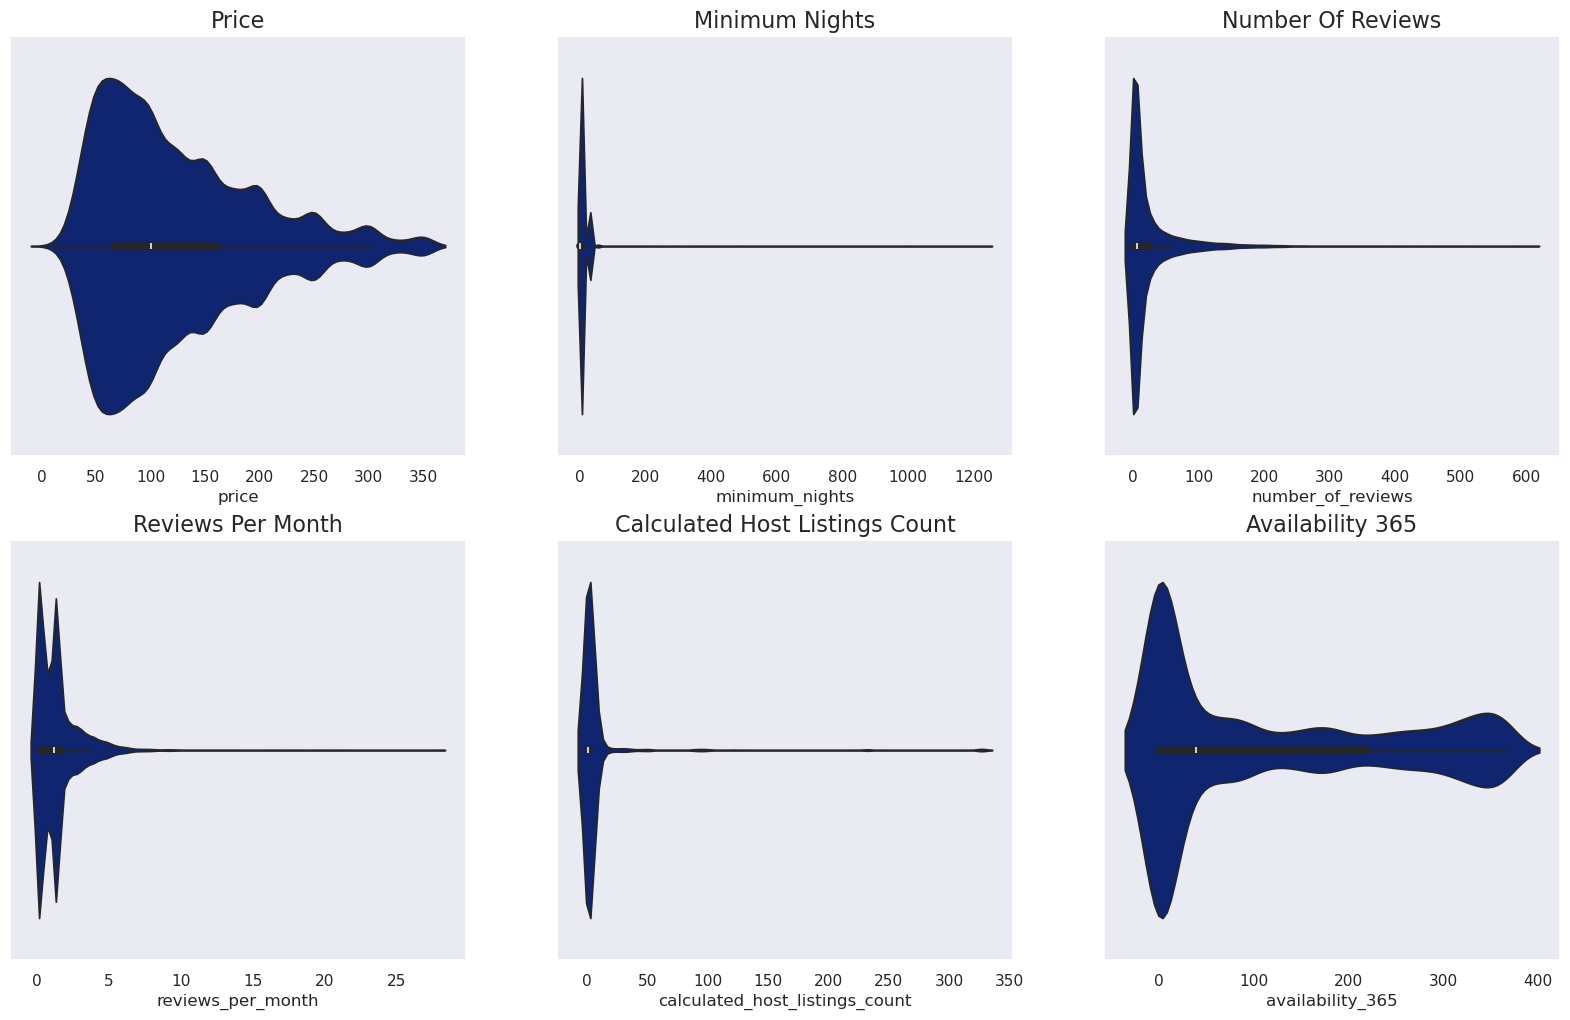

In [31]:
# Create Violin Plot of Numeric Column Data

# Set Veriables

Data_Columns = [
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

Columns = 3
Rows = math.ceil(len(Data_Columns)/Columns)

# Create Figure
fig, axes = plt.subplots(Rows, Columns, figsize=(20, 12))
axes = [axes[i][j] for i in range(Rows) for j in range(Columns)]
sns.set_theme(style="dark", palette="dark", color_codes='b')

# Plot Data
for i, col in zip(range(Rows * Columns), Data_Columns):

    # Create Plot
    ax = sns.violinplot(data=df, x=col, ax=axes[i])

    # Set Title
    title = col.replace('_', ' ').title()
    ax.set_title(title, fontsize=16)

<H3>8. Terminate the Run</H3>

In [32]:
run.finish()

<H3>9. Save the Notebook</H3>